In [71]:
import sqlalchemy
import pandas as pd
import os
from correctingagent.util.util import get_config
from correctingagent.experiments.experiment_tracking import *
from correctingagent.experiments.evaluation import read_file
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
db_location = '/home/mappelgren/Desktop/correcting-agent/db'
big_db = os.path.join(db_location, 'big.db')
rels_db = os.path.join(db_location, 'rels.db')
experiments_db = os.path.join(db_location, 'experiments.db')

# big_engine = sqlalchemy.create_engine('sqlite:///' + big_db)

# rels_engine = sqlalchemy.create_engine('sqlite:///' + rels_db)
engine = sqlalchemy.create_engine('sqlite:///' + experiments_db)

In [29]:
big = pd.read_sql('big', index_col='index', con=engine)
rels = pd.read_sql('rels', index_col='index', con=engine)
experiments = pd.read_sql('experiments', index_col='index', con=engine)

In [30]:
rels

,big_id,experiment_id
index,,
0,9,500
1,9,501
2,9,502
3,9,503
4,10,504
5,10,505
6,10,506
7,10,507
8,10,508


In [31]:
big

,experiment_name,status
index,,
0,None,None
1,bigthreerules_test,running
2,bigthreerules_test,running
3,bigthreerules_test,running
4,bigthreerules_test,running
5,bigthreerules_test,running
6,bigthreerules_test,running
7,bigthreerules_test,running
8,bigthreerules_test,running


In [32]:
experiments

,config_name,experiment_file,neural_config,status
index,,,,
0,None,None,None,None
1,simple_neural,results/simplecolours/agents.NeuralCorrectingA...,DEFAULT,done
2,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:0.1,done
3,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:1,done
4,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0,done
5,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0.4,done
6,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
7,tworules_no_update,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
8,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done


In [35]:
values = rels[rels.big_id == 10].experiment_id.values

In [47]:
def get_experiments(big_id):
    config = get_config()
    engine = sqlalchemy.create_engine('sqlite:///{}/experiments.db'.format(config['db_location']))
    
    big = pd.read_sql('big', index_col='index', con=engine)
    rels = pd.read_sql('rels', index_col='index', con=engine)
    experiments = pd.read_sql('experiments', index_col='index', con=engine)
    
    experiment_ids = rels[rels.big_id == big_id].experiment_id.values
    return experiments.iloc[values]

exp = get_experiments(10)
print(list(exp.index))

[504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553]


In [51]:
type(exp)

pandas.core.frame.DataFrame

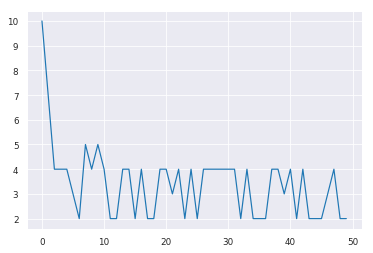

In [90]:
def load_big_experiments(list_of_experiments, dataset):
    """plot the cumulative reward for a number of experiments listed on the same axis"""
    if isinstance(list_of_experiments, pd.core.frame.DataFrame):
        list_of_experiments = list_of_experiments.index
    experiments_df = read_experiments()
    #experiments = [get_baseline(dataset)]
    experiments = []
    for experiment in list_of_experiments:
        rf = get_results_file(experiments_df, experiment)
        experiments.append(read_file(rf.name)[0])
    return np.array(experiments) # [[experiment-i]]




raw_data = load_big_experiments(get_experiments(10), 'bigthreerules')
discounted_data = -1*raw_data -10
#plt.plot((np.mean(discounted_data, axis=0)))
#np.std(discounted_data, axis=0)
plt.plot(np.median(discounted_data, axis=0))

In [92]:
print(raw_data[:, -2])

[-20 -10 -14 -12 -22 -10 -10 -14 -16 -10 -16 -10 -14 -20 -12 -10 -10 -10
 -10 -10 -32 -14 -18 -10 -12 -10 -20 -12 -26 -16 -10 -14 -18 -20 -12 -10
 -10 -12 -10 -10 -16 -14 -12 -24 -12 -10 -20 -14 -12 -16]


In [36]:
experiments[experiments.index in values]

ValueError: Lengths must match to compare

In [37]:
experiments.iloc[values]

,config_name,experiment_file,neural_config,status
index,,,,
504,bigthreerules/bigthreerules43,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
505,bigthreerules/bigthreerules41,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
506,bigthreerules/bigthreerules2,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
507,bigthreerules/bigthreerules18,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
508,bigthreerules/bigthreerules23,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
509,bigthreerules/bigthreerules34,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
510,bigthreerules/bigthreerules47,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
511,bigthreerules/bigthreerules6,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
512,bigthreerules/bigthreerules27,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
